Key Analyses Conducted:

Cast Longevity Analysis:
- Average Tenure: We calculated the average tenure of cast members by measuring the number of seasons they appeared on the show.
- Longest-Tenured Members: Identified cast members with the longest tenure to understand which individuals have had the most significant impact on the show’s history.
- Turnover Rate: We computed the turnover rate of cast members for each season by identifying new and departing members, providing insights into the show's cast stability.

In [2]:
import pandas as pd

In [3]:
# Load the dataset
actors_df = pd.read_csv('data/actors.csv')
appearances_df = pd.read_csv('data/appearances.csv')
casts_df = pd.read_csv('data/casts.csv')
characters_df = pd.read_csv('data/characters.csv')
episodes_df = pd.read_csv('data/episodes.csv')
hosts_df = pd.read_csv('data/hosts.csv')
impressions_df = pd.read_csv('data/impressions.csv')
seasons_df = pd.read_csv('data/seasons.csv')
sketches_df = pd.read_csv('data/sketches.csv')
tenure_df = pd.read_csv('data/tenure.csv')
titles_df = pd.read_csv('data/titles.csv')

In [3]:
# Get a summary of each DataFrame
print(actors_df.info())
print(actors_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   aid     2306 non-null   object
 1   url     2249 non-null   object
 2   type    2306 non-null   object
 3   gender  2306 non-null   object
dtypes: object(4)
memory usage: 72.2+ KB
None
                  aid          url   type gender
count            2306         2249   2306   2306
unique           2306         2249      4      4
top     Kate McKinnon  /Cast/?KaMc  guest   male
freq                1            1   1926   1226


In [4]:
# Check for missing values
print(actors_df.isnull().sum())

aid        0
url       57
type       0
gender     0
dtype: int64


In [5]:
# Check for duplicates
print(actors_df.duplicated().sum())

0


In [7]:
# Casts DataFrame summary
print(casts_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   aid              614 non-null    object 
 1   sid              614 non-null    int64  
 2   featured         614 non-null    bool   
 3   first_epid       50 non-null     float64
 4   last_epid        17 non-null     float64
 5   update_anchor    614 non-null    bool   
 6   n_episodes       614 non-null    int64  
 7   season_fraction  614 non-null    float64
dtypes: bool(2), float64(3), int64(2), object(1)
memory usage: 30.1+ KB
None


In [8]:
print(casts_df.head())

                aid  sid  featured  first_epid  last_epid  update_anchor  \
0  A. Whitney Brown   11      True  19860222.0        NaN          False   
1  A. Whitney Brown   12      True         NaN        NaN          False   
2  A. Whitney Brown   13      True         NaN        NaN          False   
3  A. Whitney Brown   14      True         NaN        NaN          False   
4  A. Whitney Brown   15      True         NaN        NaN          False   

   n_episodes  season_fraction  
0           8         0.444444  
1          20         1.000000  
2          13         1.000000  
3          20         1.000000  
4          20         1.000000  


In [9]:
print(casts_df.isnull().sum())  # Check for missing values

aid                  0
sid                  0
featured             0
first_epid         564
last_epid          597
update_anchor        0
n_episodes           0
season_fraction      0
dtype: int64


In [10]:
# Tenure DataFrame summary
print(tenure_df.info())
print(tenure_df.head())
print(tenure_df.isnull().sum())  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   aid          154 non-null    object
 1   n_episodes   154 non-null    int64 
 2   eps_present  154 non-null    int64 
 3   n_seasons    154 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.9+ KB
None
              aid  n_episodes  eps_present  n_seasons
0   Kate McKinnon         187          187         10
1     Alex Moffat          98           96          5
2      Ego Nwodim          56           55          3
3      Chris Redd          77           74          4
4  Kenan Thompson         361          358         18
aid            0
n_episodes     0
eps_present    0
n_seasons      0
dtype: int64


In [11]:
# Check if all actor IDs in tenure_df are present in casts_df
valid_aid = tenure_df['aid'].isin(casts_df['aid'])
tenure_df = tenure_df[valid_aid]

In [12]:
# Calculate average tenure in terms of episodes
average_episodes_tenure = tenure_df['n_episodes'].mean()
print(f"Average Tenure of Cast Members (in episodes): {average_episodes_tenure:.2f} episodes")

# Calculate average tenure in terms of seasons
average_seasons_tenure = tenure_df['n_seasons'].mean()
print(f"Average Tenure of Cast Members (in seasons): {average_seasons_tenure:.2f} seasons")

Average Tenure of Cast Members (in episodes): 73.84 episodes
Average Tenure of Cast Members (in seasons): 3.94 seasons


In [17]:
# Sort tenure data by number of episodes and seasons
longest_tenure_episodes = tenure_df.sort_values(by='n_episodes', ascending=False).head(10)
longest_tenure_seasons = tenure_df.sort_values(by='n_seasons', ascending=False).head(10)

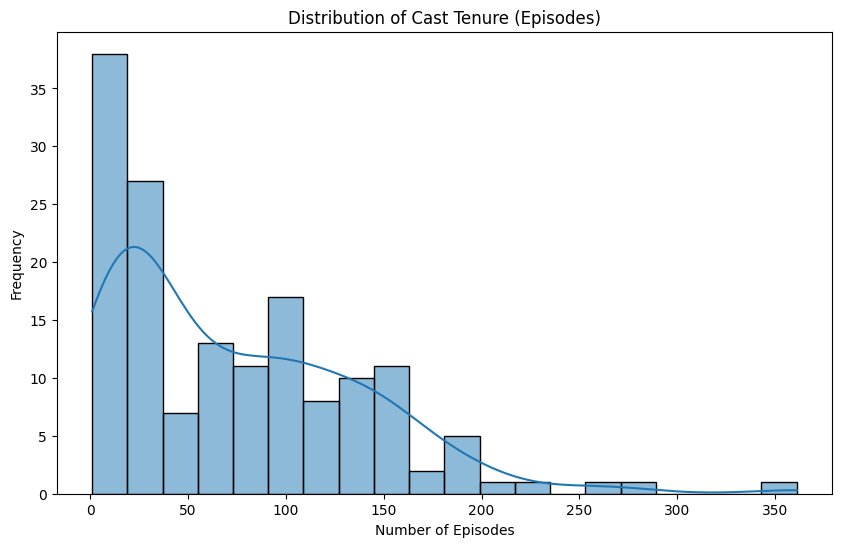

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of tenure in episodes
plt.figure(figsize=(10, 6))
sns.histplot(tenure_df['n_episodes'], bins=20, kde=True)
plt.title('Distribution of Cast Tenure (Episodes)')
plt.xlabel('Number of Episodes')
plt.ylabel('Frequency')
plt.show()

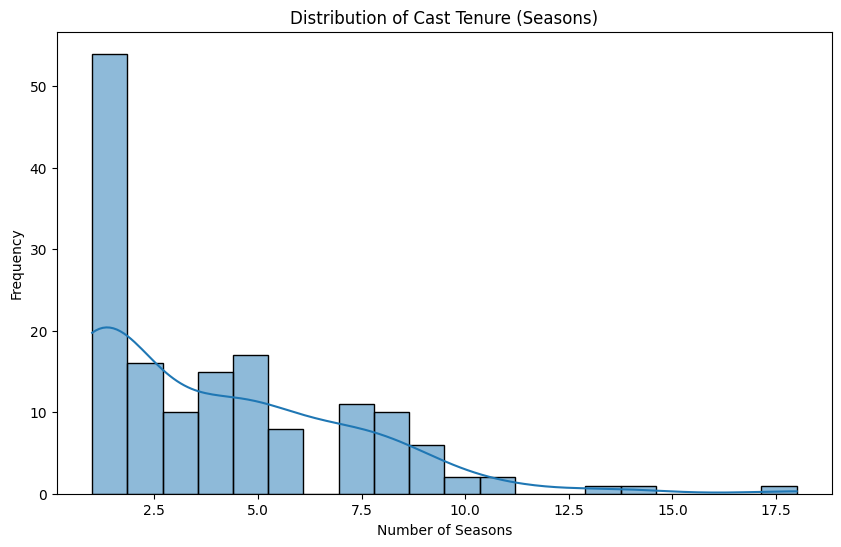

In [20]:
# Plot distribution of tenure in seasons
plt.figure(figsize=(10, 6))
sns.histplot(tenure_df['n_seasons'], bins=20, kde=True)
plt.title('Distribution of Cast Tenure (Seasons)')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()

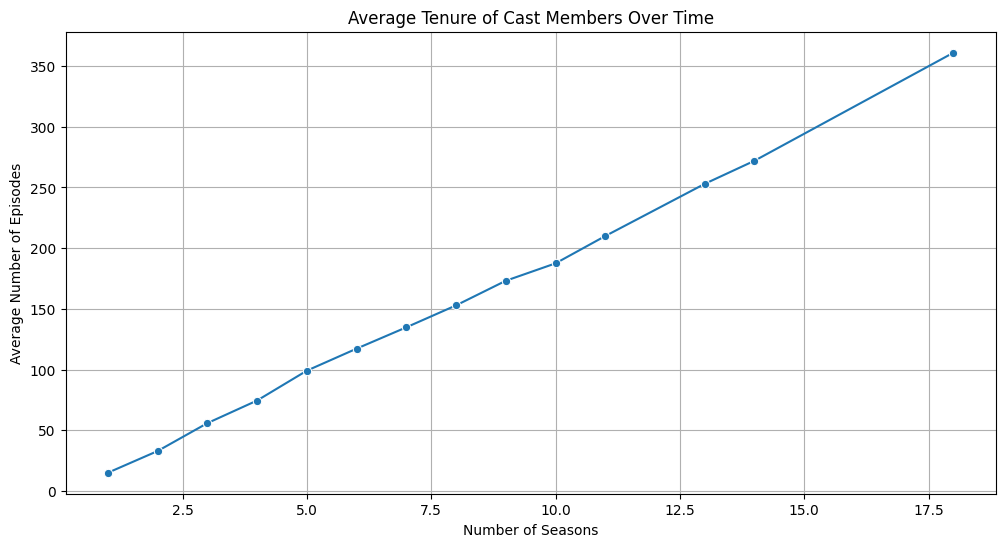

In [21]:
# Calculate average tenure by season
avg_tenure_by_season = tenure_df.groupby('n_seasons')['n_episodes'].mean().reset_index()

# Plot average tenure over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_tenure_by_season, x='n_seasons', y='n_episodes', marker='o')
plt.title('Average Tenure of Cast Members Over Time')
plt.xlabel('Number of Seasons')
plt.ylabel('Average Number of Episodes')
plt.grid()
plt.show()

In [23]:
# Create a dictionary with each season (sid) as the key and a set of unique cast members (aid) as the value
season_casts = casts_df.groupby('sid')['aid'].apply(set).to_dict()

# Display the dictionary
print(season_casts)


{1: {'Jane Curtin', 'Dan Aykroyd', 'Laraine Newman', "Michael O'Donoghue", 'Gilda Radner', 'Garrett Morris', 'George Coe', 'Chevy Chase', 'John Belushi'}, 2: {'Jane Curtin', 'Bill Murray', 'Dan Aykroyd', 'Laraine Newman', 'Gilda Radner', 'Garrett Morris', 'Chevy Chase', 'John Belushi'}, 3: {'Jane Curtin', 'Bill Murray', 'Dan Aykroyd', 'Al Franken', 'Laraine Newman', 'Gilda Radner', 'Garrett Morris', 'John Belushi', 'Tom Davis'}, 4: {'Jane Curtin', 'Bill Murray', 'Dan Aykroyd', 'Al Franken', 'Laraine Newman', 'Gilda Radner', 'Garrett Morris', 'John Belushi', 'Tom Davis'}, 5: {'Jane Curtin', 'Jim Downey', 'Bill Murray', 'Paul Shaffer', 'Tom Schiller', 'Al Franken', 'Brian Doyle-Murray', 'Don Novello', 'Laraine Newman', 'Alan Zweibel', 'Gilda Radner', 'Garrett Morris', 'Harry Shearer', 'Peter Aykroyd', 'Tom Davis'}, 6: {'Charles Rocket', 'Yvonne Hudson', 'Eddie Murphy', 'Ann Risley', 'Laurie Metcalf', 'Tony Rosato', 'Emily Prager', 'Tim Kazurinsky', 'Denny Dillon', 'Robin Duke', 'Matthew 

In [24]:
# Initialize an empty list to store turnover rates
turnover_rates = []

# Loop through each season starting from the second one
for current_season in range(min(casts_df['sid']) + 1, max(casts_df['sid']) + 1):
    # Get the previous season
    previous_season = current_season - 1
    
    # Ensure both seasons have data
    if previous_season in season_casts and current_season in season_casts:
        # Cast members who were in the previous season
        previous_cast = season_casts[previous_season]
        
        # Cast members who are in the current season
        current_cast = season_casts[current_season]
        
        # Calculate the number of cast members who left
        left_cast = previous_cast - current_cast
        number_left = len(left_cast)
        
        # Calculate turnover rate
        turnover_rate = number_left / len(previous_cast)
        
        # Append the turnover rate with the season info
        turnover_rates.append({
            'previous_season': previous_season,
            'current_season': current_season,
            'turnover_rate': turnover_rate,
            'number_left': number_left
        })

In [25]:
# Create a DataFrame to display turnover rates
turnover_df = pd.DataFrame(turnover_rates)

# Display the DataFrame
turnover_df

,previous_season,current_season,turnover_rate,number_left
0,1,2,0.222222,2
1,2,3,0.125000,1
2,3,4,0.000000,0
3,4,5,0.222222,2
4,5,6,1.000000,15
5,6,7,0.666667,10
6,7,8,0.375000,3
7,8,9,0.000000,0
8,9,10,0.555556,5
9,10,11,1.000000,10


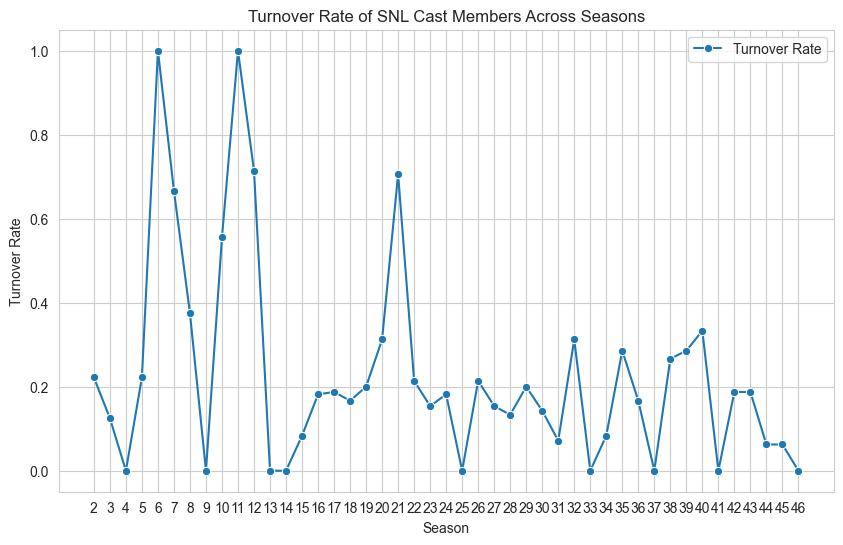

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot turnover rates over the seasons
plt.figure(figsize=(10, 6))
sns.lineplot(data=turnover_df, x='current_season', y='turnover_rate', marker='o', label='Turnover Rate')
plt.xticks(turnover_df['current_season'])
plt.title('Turnover Rate of SNL Cast Members Across Seasons')
plt.xlabel('Season')
plt.ylabel('Turnover Rate')
plt.grid(True)
plt.show()


In [4]:
# Merge the dataframes on 'aid'
merged_df = pd.merge(casts_df, actors_df[['aid', 'gender']], on='aid', how='left')

In [5]:
# Check for missing gender data
missing_genders = merged_df[merged_df['gender'].isnull()]
print(f"Missing gender data for {len(missing_genders)} cast members.")

Missing gender data for 0 cast members.


In [6]:
print(merged_df.head())

                aid  sid  featured  first_epid  last_epid  update_anchor  \
0  A. Whitney Brown   11      True  19860222.0        NaN          False   
1  A. Whitney Brown   12      True         NaN        NaN          False   
2  A. Whitney Brown   13      True         NaN        NaN          False   
3  A. Whitney Brown   14      True         NaN        NaN          False   
4  A. Whitney Brown   15      True         NaN        NaN          False   

   n_episodes  season_fraction gender  
0           8         0.444444   male  
1          20         1.000000   male  
2          13         1.000000   male  
3          20         1.000000   male  
4          20         1.000000   male  


In [10]:
# Use the unstack method to pivot the data with 'sid' as the index and 'gender' as columns.
# This will create columns based on unique values in the 'gender' column.
gender_counts = merged_df.groupby(['sid', 'gender']).size().unstack(fill_value=0).reset_index()

# Check the columns to see what has been generated
print(gender_counts.columns)

# Rename the columns based on unique gender values found
gender_counts.columns = ['season'] + list(gender_counts.columns[1:])

# Assign meaningful column names dynamically if they are known
if 'male' in gender_counts.columns and 'female' in gender_counts.columns:
    gender_counts.rename(columns={'male': 'male_count', 'female': 'female_count'}, inplace=True)
else:
    # Otherwise, print the columns to understand the issue
    print(gender_counts.columns)

# Fill missing columns with zero if they don't exist
for col in ['male_count', 'female_count']:
    if col not in gender_counts.columns:
        gender_counts[col] = 0

# Calculate total cast and gender ratios
gender_counts['total_cast'] = gender_counts['female_count'] + gender_counts['male_count']
gender_counts['female_ratio'] = gender_counts['female_count'] / gender_counts['total_cast']
gender_counts['male_ratio'] = gender_counts['male_count'] / gender_counts['total_cast']

print(gender_counts.head())

Index(['sid', 'female', 'male', 'unknown'], dtype='object', name='gender')
   season  female_count  male_count  unknown  total_cast  female_ratio  \
0       1             3           6        0           9      0.333333   
1       2             3           5        0           8      0.375000   
2       3             3           6        0           9      0.333333   
3       4             3           6        0           9      0.333333   
4       5             3          12        0          15      0.200000   

   male_ratio  
0    0.666667  
1    0.625000  
2    0.666667  
3    0.666667  
4    0.800000  


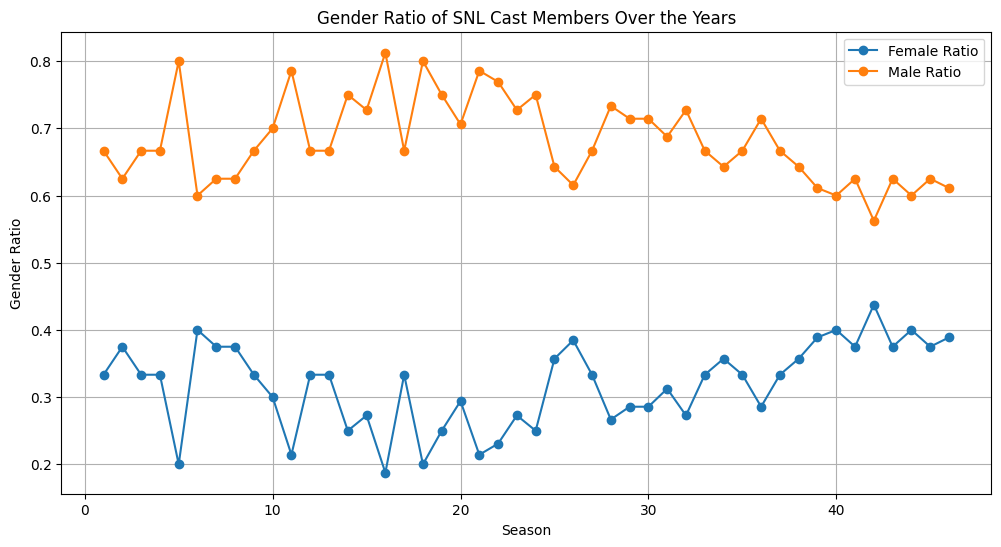

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(gender_counts['season'], gender_counts['female_ratio'], marker='o', label='Female Ratio')
plt.plot(gender_counts['season'], gender_counts['male_ratio'], marker='o', label='Male Ratio')
plt.title('Gender Ratio of SNL Cast Members Over the Years')
plt.xlabel('Season')
plt.ylabel('Gender Ratio')
plt.legend()
plt.grid(True)
plt.show()

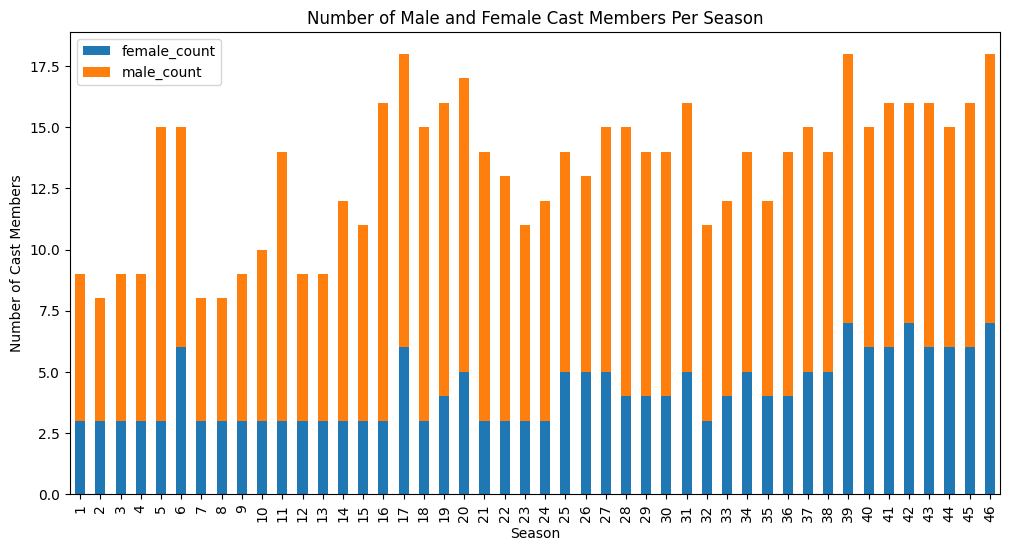

In [12]:
gender_counts.set_index('season')[['female_count', 'male_count']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Male and Female Cast Members Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Cast Members')
plt.show()